## Modelisation with UNET Mini

In [1]:
import sys  
sys.path.insert(0, './scripts')

# Import librairies, configs, helper functions
from helpers import *

config = base_config_resized

# config["use_saved_model_path"] = "./model_delete.keras"
config["val_sample_nb"] = 100
config["train_sample_nb"] = 400
config["mlwflow_experiment_title"] = "UNET Mini - Augmented"
config["epoch"] = 4

n = NotebookProcessor(config)

## Model definition

UNET is lorem ipsum

## Model creation

In [ ]:

def conv_block(input_tensor, num_filters, dropout_rate=0.1):  
    x = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(input_tensor)  
    x = BatchNormalization()(x)  # Adding batch normalization  
    x = Dropout(dropout_rate)(x)  
    x = Conv2D(num_filters, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)  
    x = BatchNormalization()(x)  # Adding batch normalization  
    return x  
  
def create_model(n_classes, img_width, img_height, img_channels):  
    inputs = Input((img_height, img_width, img_channels))  
  
    # Contraction path  
    c1 = conv_block(inputs, 16)  # Starting with fewer filters  
    p1 = MaxPooling2D((2, 2))(c1)  
      
    c2 = conv_block(p1, 32)  
    p2 = MaxPooling2D((2, 2))(c2)  
  
    c3 = conv_block(p2, 64)  # For mini U-Net, this could be considered as the bottleneck  
  
    # Expansive path   
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)  
    u4 = concatenate([u4, c2])  
    c4 = conv_block(u4, 32)  
       
    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)  
    u5 = concatenate([u5, c1])  
    c5 = conv_block(u5, 16)  
       
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c5)  
       
    model = Model(inputs=[inputs], outputs=[outputs])  
    return model  

## Model Stats

### With augment

2024-02-28 15:07:56.071839: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-02-28 15:07:56.071862: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2024-02-28 15:07:56.071865: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2024-02-28 15:07:56.071900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-28 15:07:56.071915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


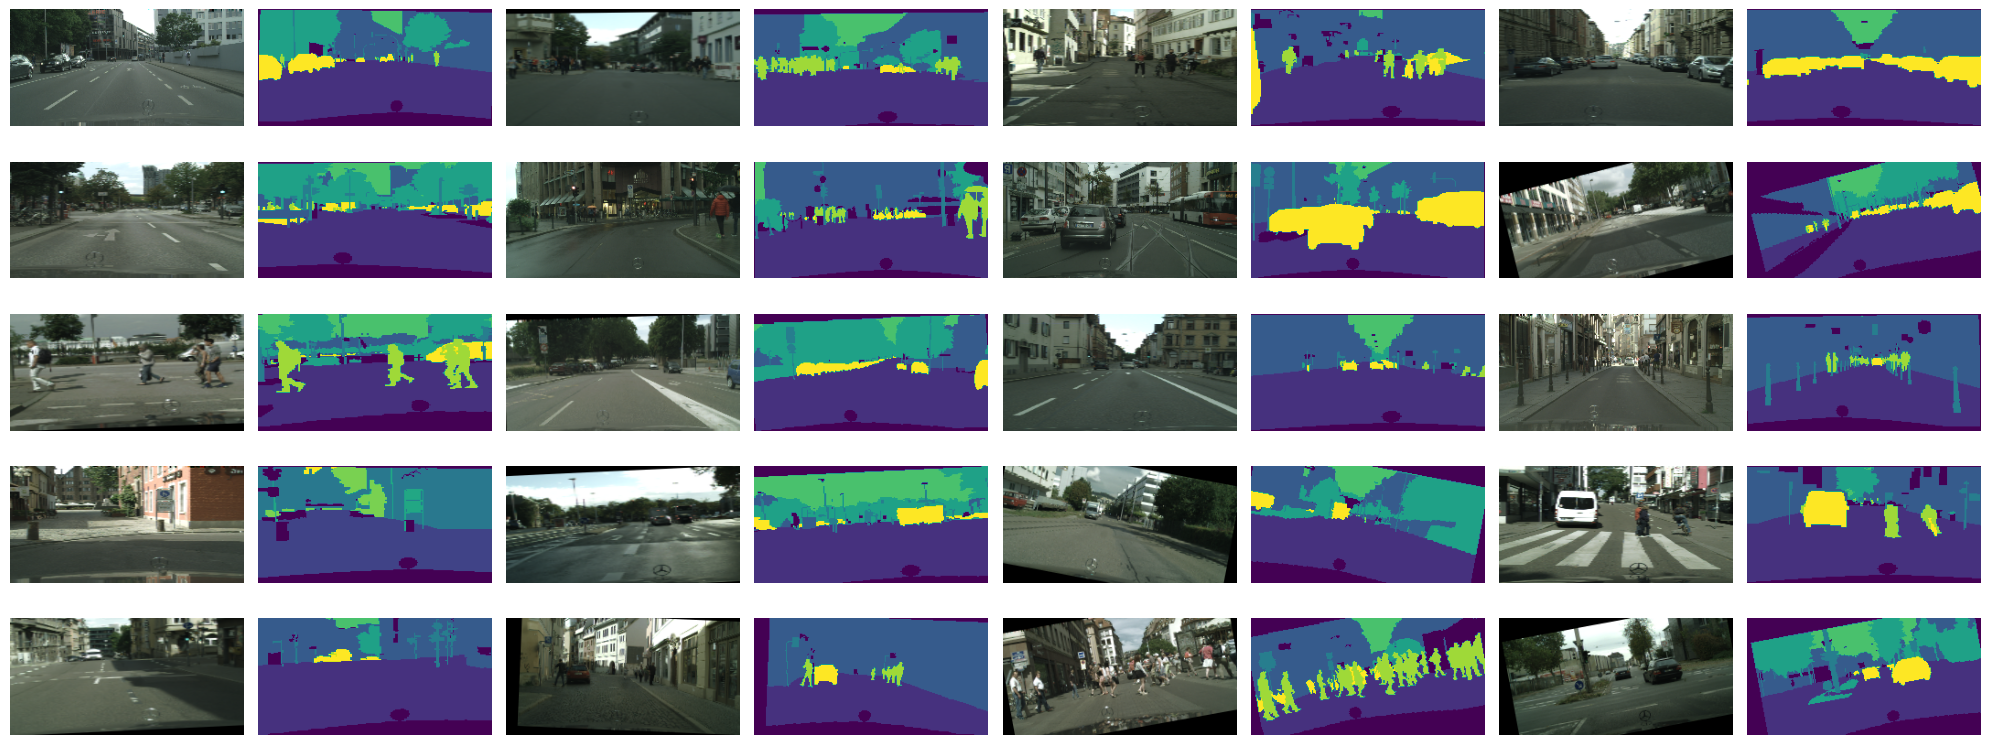

In [ ]:
show_data_generator_images_sample(n)

In [ ]:
model = create_model(n_classes=config["classes"], img_width=config["width"], img_height=config["height"], img_channels=3)
n.set_model(model)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 256, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 dropout (Dropout)           (None, 128, 256, 16)         0         ['batch_normalization[0][0

In [ ]:
n.model_fit()

Epoch 1/4


2024-02-28 15:08:02.204760: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


133/133 [==============================] - 35s 256ms/step - loss: 1.1608 - dice_coef: 0.4867 - iou: 0.3291 - accuracy: 0.6431 - val_loss: 3.9531 - val_dice_coef: 0.3482 - val_iou: 0.2142 - val_accuracy: 0.3876
Epoch 2/4
133/133 [==============================] - 34s 252ms/step - loss: 0.7904 - dice_coef: 0.6270 - iou: 0.4611 - accuracy: 0.7521 - val_loss: 2.8298 - val_dice_coef: 0.3939 - val_iou: 0.2499 - val_accuracy: 0.4024
Epoch 3/4
133/133 [==============================] - 35s 264ms/step - loss: 0.6934 - dice_coef: 0.6742 - iou: 0.5129 - accuracy: 0.7830 - val_loss: 1.6567 - val_dice_coef: 0.5393 - val_iou: 0.3770 - val_accuracy: 0.5728
Epoch 4/4
133/133 [==============================] - 33s 251ms/step - loss: 0.6424 - dice_coef: 0.6981 - iou: 0.5407 - accuracy: 0.7983 - val_loss: 1.0282 - val_dice_coef: 0.6283 - val_iou: 0.4649 - val_accuracy: 0.6849


NameError: name 'val_acc' is not defined

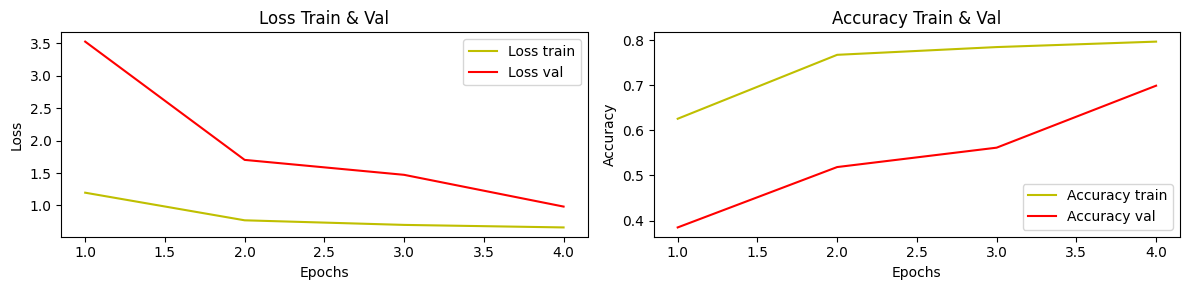

1/1 [==============================] - 0s 169ms/step


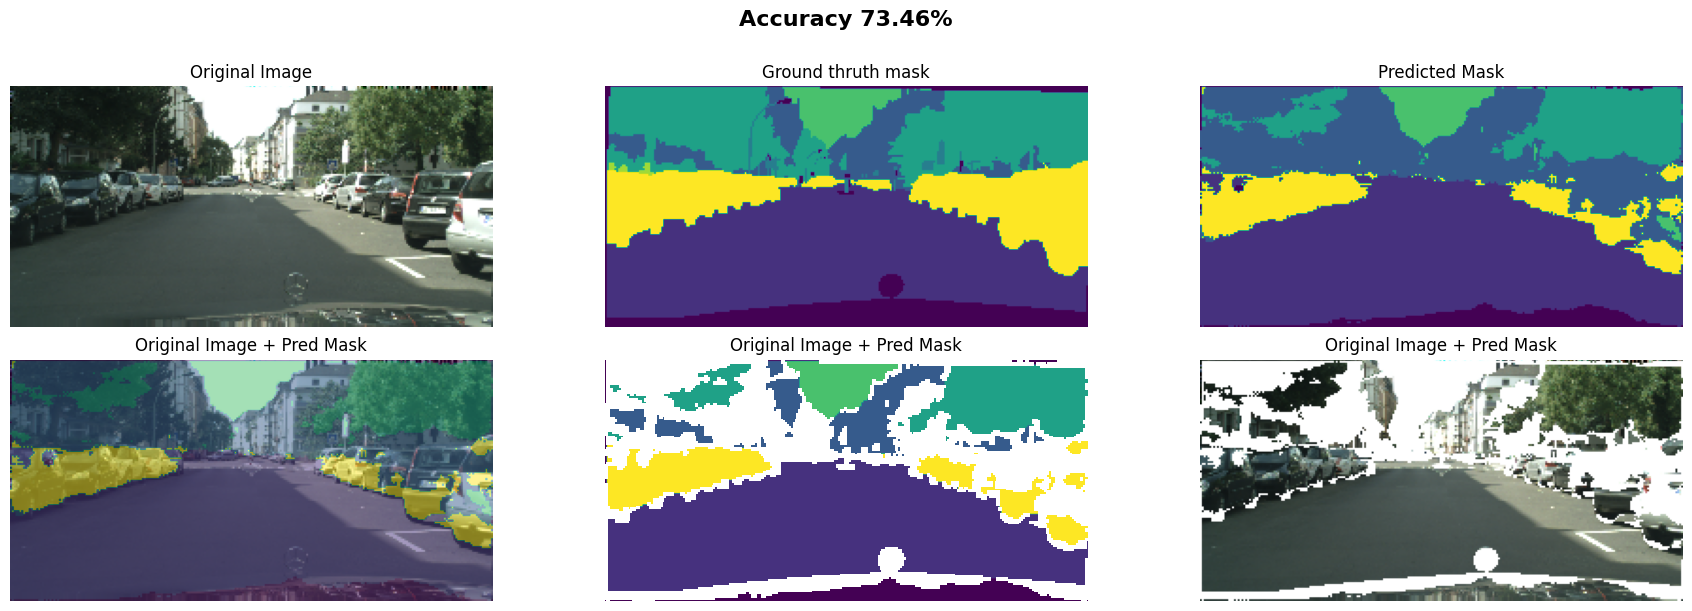

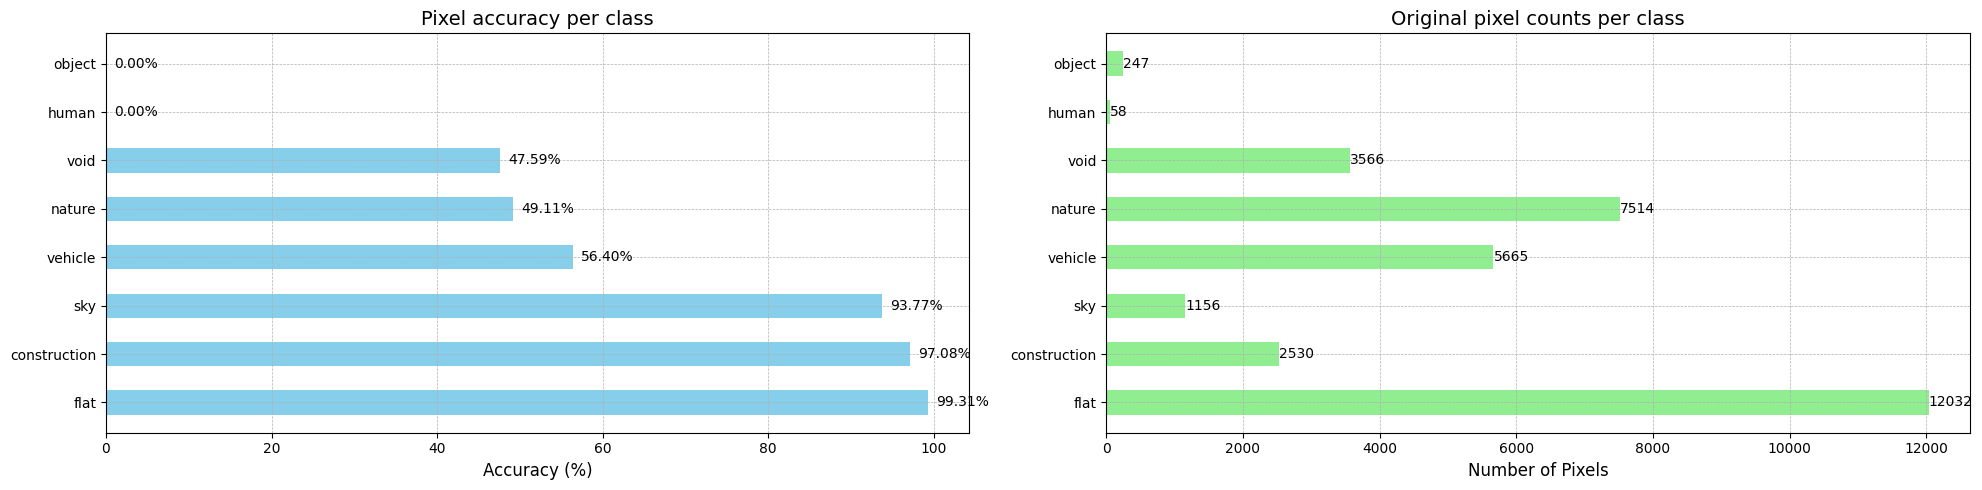

In [ ]:
display_loss_and_accuracy(n.model_fit_history)
n.model_predict_with_display_and_accuracy(n.img["val"][0],n.mask["val"][0])

### Without augment

{
    "width": 256,
    "height": 128,
    "classes": 8,
    "epoch": 4,
    "use_augment": false,
    "augment_per_image": 1,
    "batch_size": 3,
    "mlwflow_tracking_uri": "http://127.0.0.1:5000",
    "mlwflow_experiment_title": "UNET Mini Not Augmented",
    "train_sample_nb": 400,
    "val_sample_nb": 100,
    "use_saved_model_path": "",
    "gtFine_path": "./data/P8_Cityscapes_gtFine_trainvaltest.zip",
    "leftImg8bit_path": "./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip",
    "data_path": "./data/gtFine"
} 

Dataset already exist, skip downloading: ./data/P8_Cityscapes_gtFine_trainvaltest.zip
Dataset already exist, skip downloading: ./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip

- Sampling the training dataset from 2975 to 400.

- Sampling the validation dataset from 326 to 100.


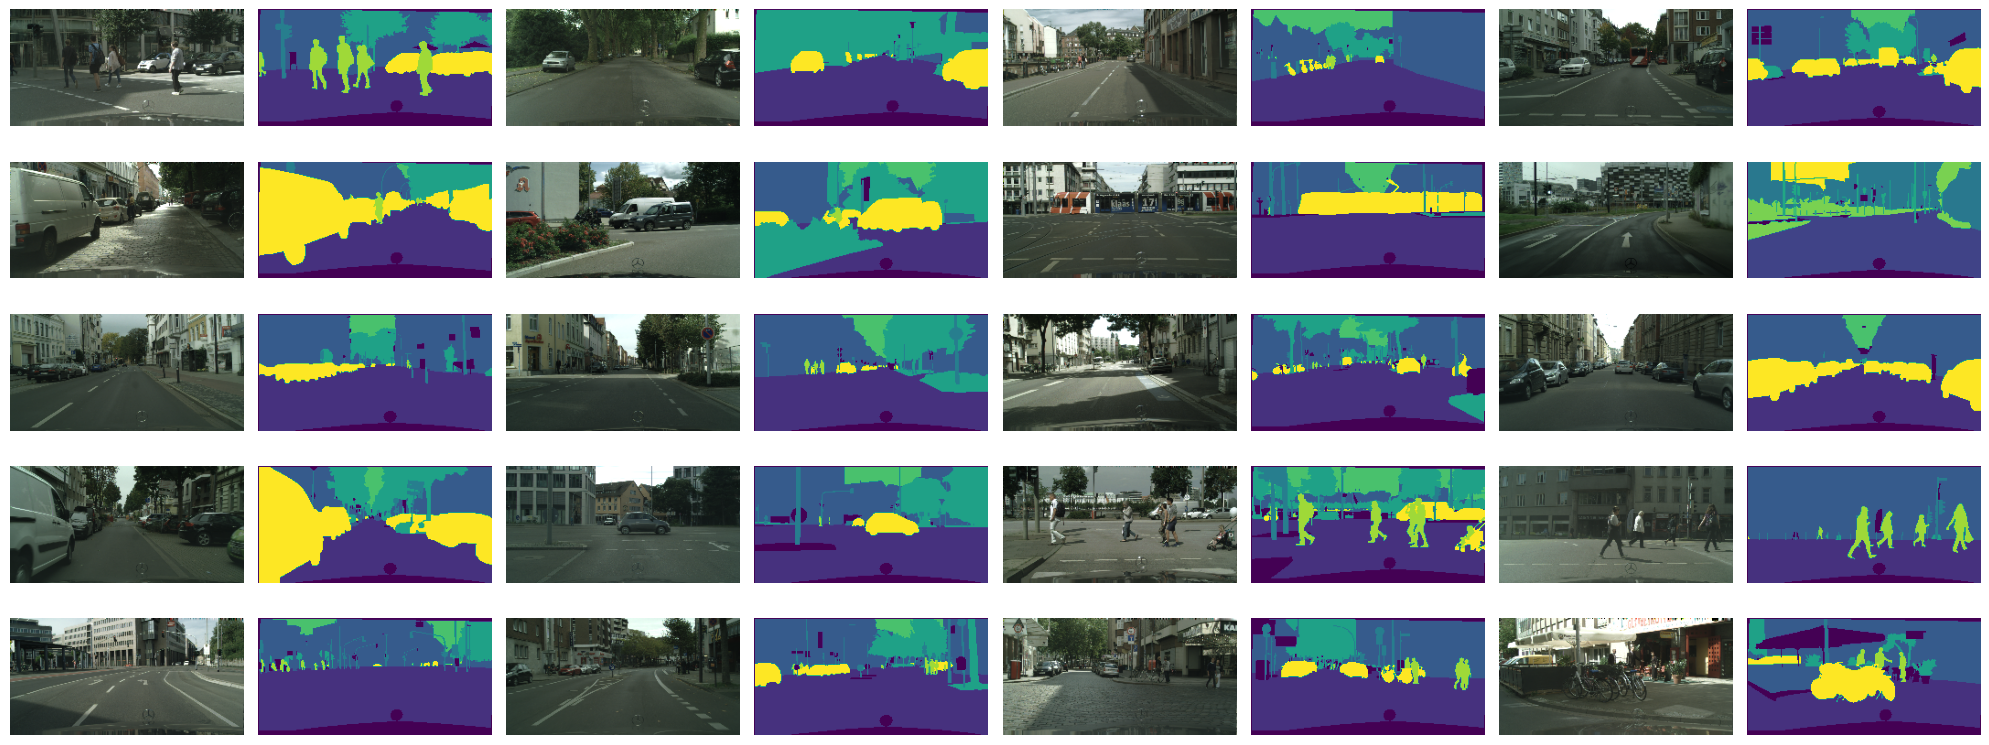

In [ ]:
config_not_aug = {
    **config,
    "use_augment": False,
    "mlwflow_experiment_title":"UNET Mini - Not Augmented"

}

n_not_aug = NotebookProcessor(config_not_aug)
show_data_generator_images_sample(n_not_aug)

In [ ]:
model_not_aug = create_model(n_classes=config["classes"], img_width=config["width"], img_height=config["height"], img_channels=3)
n_not_aug.set_model(model_not_aug)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 256, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 128, 256, 16)         448       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_10 (Ba  (None, 128, 256, 16)         64        ['conv2d_11[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 dropout_5 (Dropout)         (None, 128, 256, 16)         0         ['batch_normalization_10

In [ ]:
n_not_aug.model_fit()

Epoch 1/4
133/133 [==============================] - 36s 261ms/step - loss: 1.1311 - dice_coef: 0.4884 - iou: 0.3335 - accuracy: 0.6597 - val_loss: 3.2883 - val_dice_coef: 0.3400 - val_iou: 0.2081 - val_accuracy: 0.3741
Epoch 2/4
133/133 [==============================] - 37s 275ms/step - loss: 0.7596 - dice_coef: 0.6437 - iou: 0.4787 - accuracy: 0.7763 - val_loss: 1.6984 - val_dice_coef: 0.4903 - val_iou: 0.3314 - val_accuracy: 0.5158
Epoch 3/4
133/133 [==============================] - 34s 257ms/step - loss: 0.6751 - dice_coef: 0.6856 - iou: 0.5256 - accuracy: 0.7968 - val_loss: 1.2749 - val_dice_coef: 0.5299 - val_iou: 0.3656 - val_accuracy: 0.5901
Epoch 4/4
133/133 [==============================] - 33s 247ms/step - loss: 0.6316 - dice_coef: 0.7079 - iou: 0.5523 - accuracy: 0.8073 - val_loss: 0.8582 - val_dice_coef: 0.6553 - val_iou: 0.4935 - val_accuracy: 0.7279

Model trained!



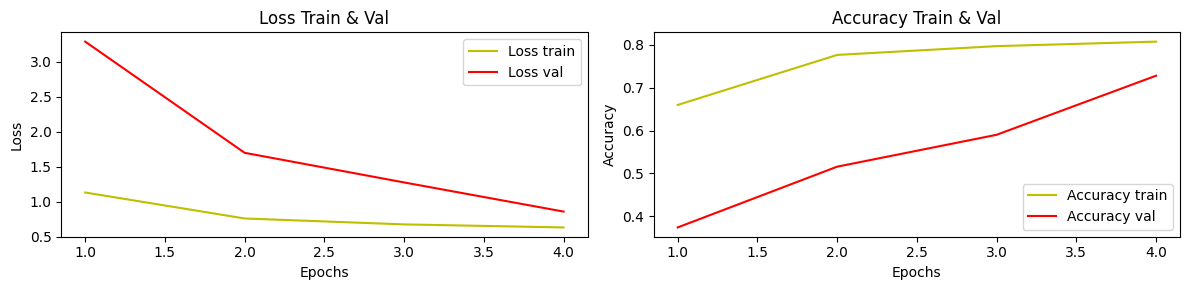

1/1 [==============================] - 0s 147ms/step


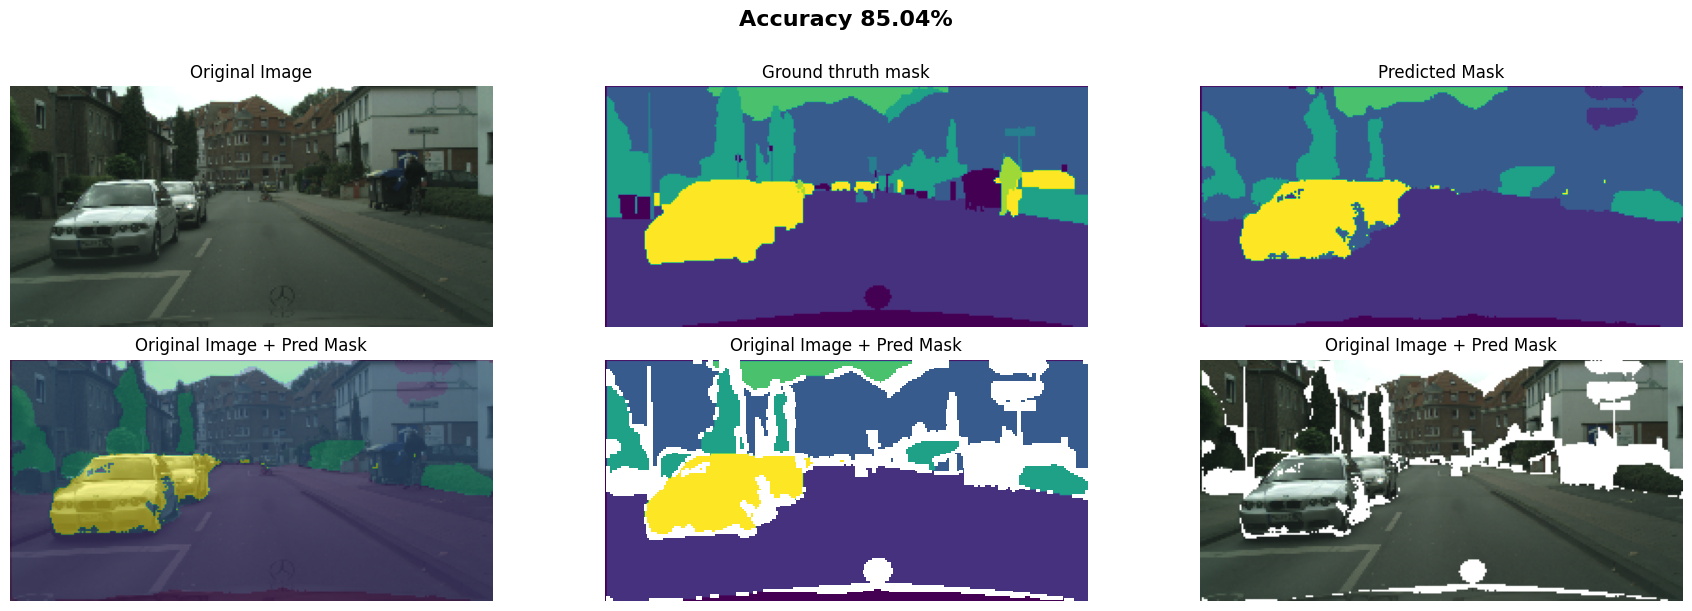

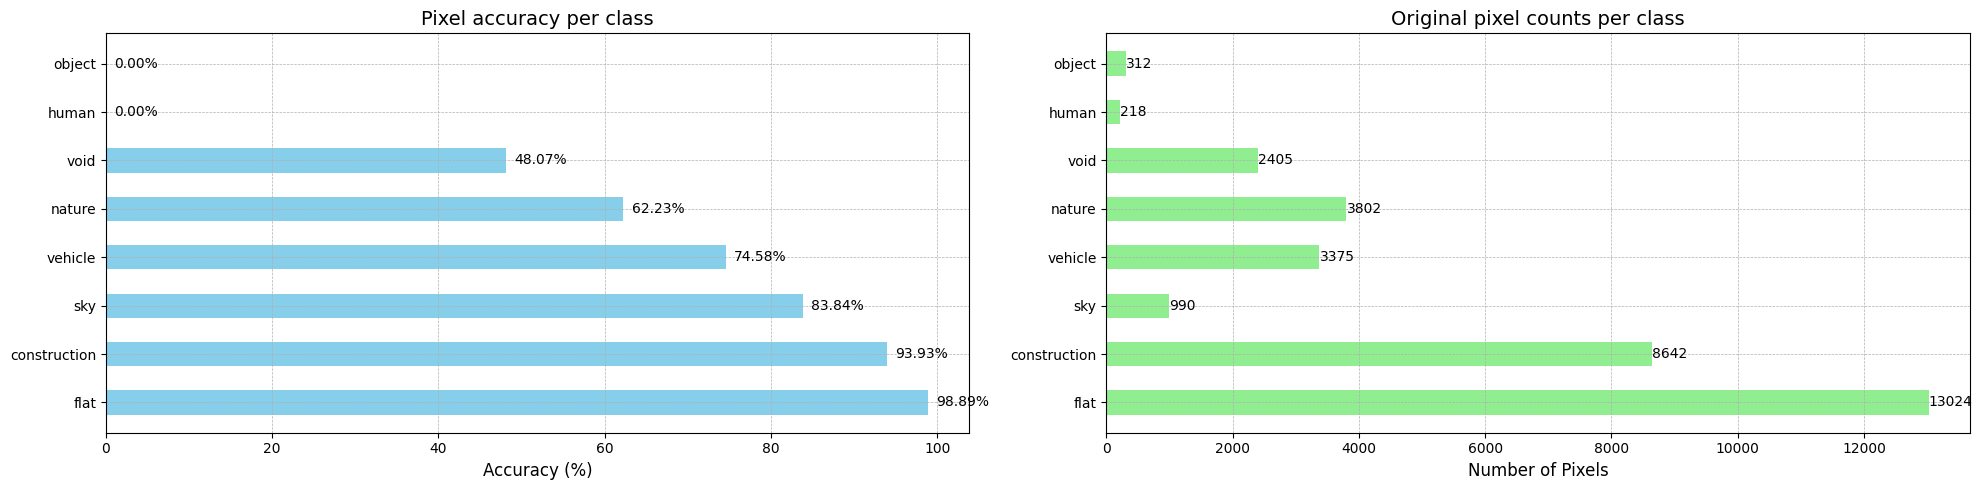

In [ ]:
display_loss_and_accuracy(n_not_aug.model_fit_history)
n_not_aug.model_predict_with_display_and_accuracy(n_not_aug.img["test"][1],n_not_aug.mask["test"][1])

### Performance comparaison augmented vs not

58/58 [==============================] - 11s 197ms/step - loss: 0.5873 - dice_coef: 0.7234 - iou: 0.5702 - accuracy: 0.8108


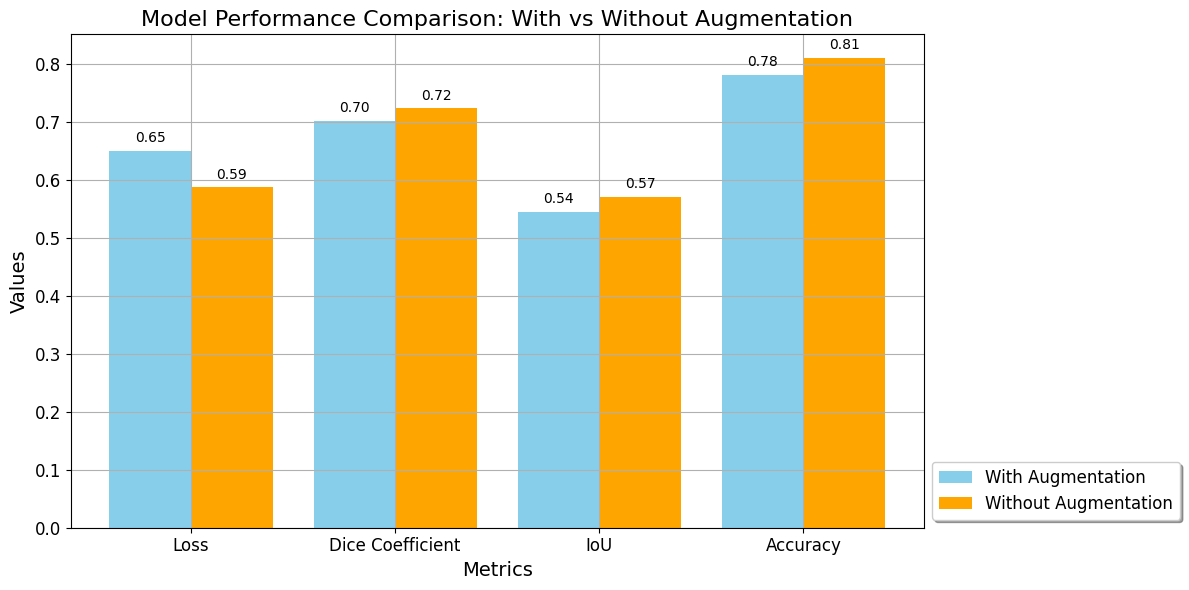

In [ ]:
evaluate_with_and_without_aug(n, n_not_aug)

## Model Inference

In [ ]:
n.model_inference_with_display(n.img["test"][3])

In [ ]:
n_not_aug.model_inference_with_display(n_not_aug.img["test"][3])